## Analisando as notas em geral

In [2]:
import pandas as pd
import seaborn as sns
notas = pd.read_csv("../01.Dados/ratings.csv")

#Mostrar as cinco primeiras
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [45]:
notas.shape

(100836, 4)

In [75]:
notas.columns = ["usuarioId","filmeId","nota","momento"]
notas.head()

In [47]:
#Função advinda do pandas.series, unique() -> mostrar todos os valores distintos
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [48]:
#Contar quantas vezes o número aparece
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [49]:
notas['nota'].mean()

3.501556983616962

In [50]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

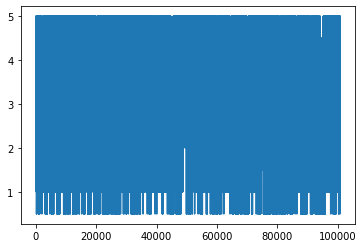

In [51]:
#Por padrão o plot faz um gráfico de linha que a imagem são os valores que se repetem e no eixo x a quantidade de 
#vezes que se repete(value_counts() visualmente)
notas.nota.plot()

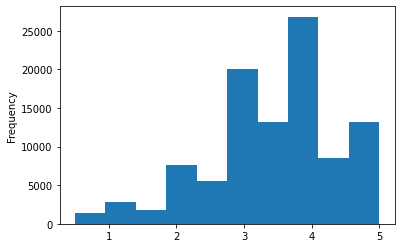

In [52]:
#Histograma é uma forma de visualizar mais nítido
notas.nota.plot(kind="hist")

In [53]:
#Mediana do banco de dados
print("Média: ",notas['nota'].mean(),'\n',"Mediana: ",notas['nota'].median())

Média:  3.501556983616962 
 Mediana:  3.5


In [54]:
#Descrição completa sobre a coluna notas
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

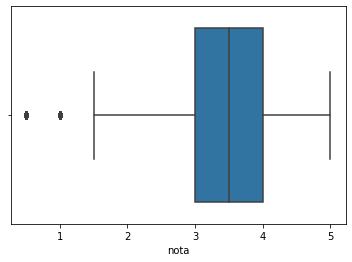

In [55]:
#Descrição completa sobre a coluna notas visualmente, uma espécie de 'Explorate data analysis'
sns.boxplot(notas.nota)

In [66]:
filmes = pd.read_csv("../01.Dados/movies.csv")
filmes.columns = ["filmeId","titulo","genero"]#Não coloque acento pois fica ruim usar filmes.título,por exemplo
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Analisando alguma notas específicas por filme

In [65]:
"""
Como query no banco de dados, você pode 
fazer uma pesquisa no data frame para 
ter noção melhor do que está trabalhando
"""
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [83]:
#Agrupar as notas pelo os filmes
filme_nota = notas.groupby('filmeId').nota # devolve uma série
medias_por_filme = filme_nota.mean()# o id agora eh o filme, pois é uma série
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

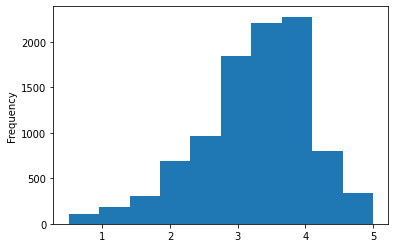

In [84]:
#Plotagem da distribuição das nota por histograma
medias_por_filme.plot(kind="hist")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64


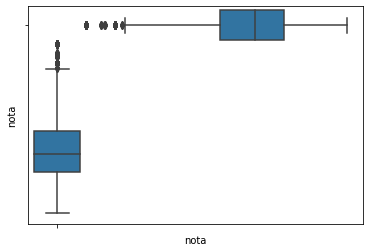

In [100]:
#Mostrar com os dados na vertical
print(sns.boxplot(y=medias_por_filme))

#Mostrar com dados na horizontal, padrão
print(sns.boxplot(medias_por_filme))

print(medias_por_filme.describe())

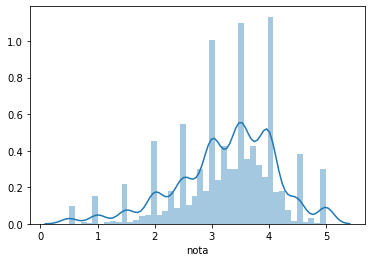

In [89]:
sns.distplot(medias_por_filme)# aqui a função do seaborn definiu mais intervalos entre as médias para gerar o hist

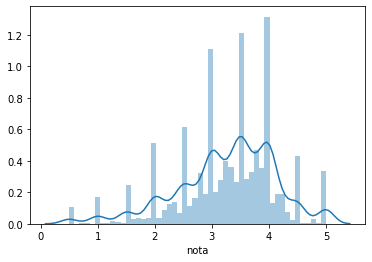

In [92]:
sns.distplot(medias_por_filme,bins=50)# o seaborn, por padrão procura o melhor 'bins'

Text(0.5, 1.0, 'Histograma da médias dos filmes')

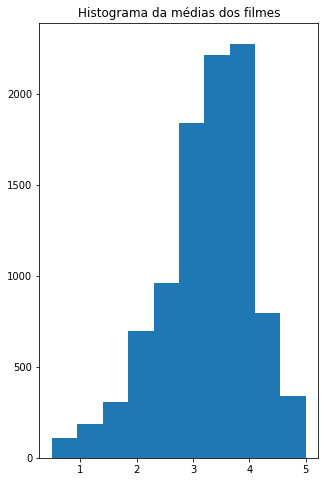

In [101]:
# O Seaborn usa o  matplotlib por baixo
# já é importado com o seaborn, mas nós importamos pois ele pode mexer nas configurações padrão das imagens
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,8))#(horizontal,vertical)
plt.hist(medias_por_filme)
plt.title("Histograma da médias dos filmes")

In [104]:
#Carregar os arquivos de filmes de tmdb 5000 do site kaggle(link:https://www.kaggle.com/tmdb/tmdb-movie-metadata)
tmdb = pd.read_csv("../01.Dados/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [105]:
#Não tem ordem aqui : dados qualitativos
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# budget => orçamento => quantidade continua
# quantidade de votos eh um inteiro então eh discretro

In [114]:
tmdb.original_language # aqui eh mais direta, mas tem não posso usar espaço ou palavras-chave padrões do python
print(tmdb['original_language'].value_counts().index)

#Tansformar o resultado(série) em um data frame -> to_frame() e add um index -> reset_index()
contagem_linguas = tmdb['original_language'].value_counts().to_frame().reset_index()

#Renomeando as colunas
contagem_linguas.columns = ['original_language','total']
contagem_linguas.head()

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'ro', 'ta', 'id', 'cs', 'ar', 'af',
       'ky', 'nb', 'is', 'hu', 'te', 'tr', 'sl', 'el', 'vi', 'ps', 'no', 'pl',
       'xx'],
      dtype='object')


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


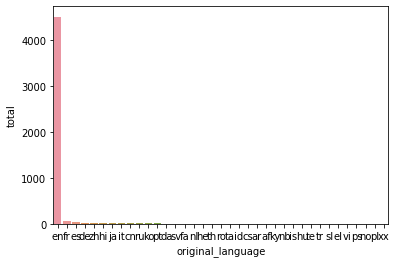

In [115]:
sns.barplot(x="original_language",y="total",data=contagem_linguas)
#Mau visualizado

0.10.0


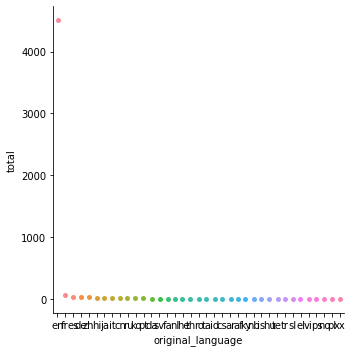

In [117]:
#Plotagem de mais alto nivel ou mais específico,plotar por categoria
sns.catplot(x="original_language",y="total",data=contagem_linguas)

#Versão do seaborn que roda no jupyter, !pip install seaborn==0.10.0
print(sns.__version__)

([<matplotlib.patches.Wedge at 0x7f60d2eb25d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

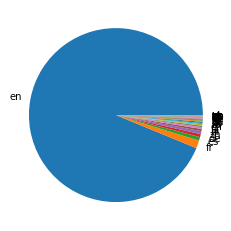

In [122]:
plt.pie(contagem_linguas["total"],labels = contagem_linguas["original_language"])
#Quase niguém usa o grafico de pizza ou torta

In [135]:
#Procure um gráfico para passar uma mensagem para o cliente
#Comprar inglês com ourtas linguas, pois ele está em maioria
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
print("Total de filmes em inglês: ",total_de_ingles)
print("Total todos os filmes: ",total_geral-total_de_ingles)

Total de filmes em inglês:  4505
Total todos os filmes:  298


In [137]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles,total_geral-total_de_ingles]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


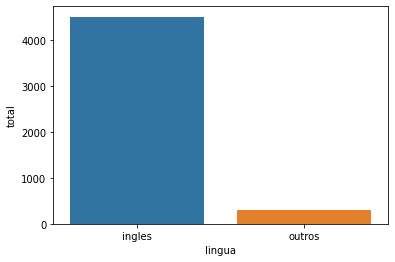

In [138]:
sns.barplot(x="lingua",y='total',data=dados)
#Melhor, compara ingles com o resto, uma melhor história de contar

In [153]:
#query = pergunta
total_sem_ingles = tmdb.query("original_language!='en'").original_language.value_counts()
df_total_sem_ingles = total_sem_ingles.to_frame().reset_index()
df_total_sem_ingles.columns = ['original_language','counts']
df_total_sem_ingles

,original_language,counts
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19
5,ja,16
6,it,14
7,cn,12
8,ru,11
9,ko,11


# Revisando o papel da média, mediana, medidas de tendência cental, dispersão, desvio padrão, box plot e histograma

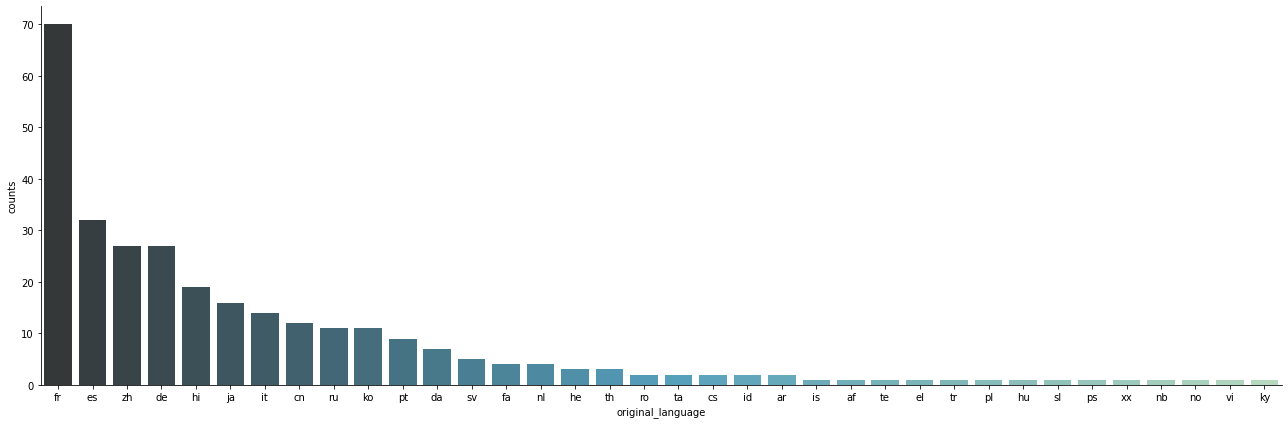

In [186]:
#plt.figure(figsize=(15,5))
#sns.barplot(x="original_language",y="counts",data=df_total_sem_ingles)

#sns.catplot é mais alto nivel
sns.catplot(x="original_language",y="counts",
            data=df_total_sem_ingles,kind='bar',palette='GnBu_d'#variar para quando temos um tom sequencial
            ,height=6,aspect=3)

In [188]:
filmes.head(10)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [195]:
notas_toy_story=notas.query('filmeId==1');
notas_toy_story

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [199]:
print("Nota média do Toy Sotry: %.2f" % notas_toy_story.nota.mean())

Nota média do Toy Sotry: 3.92


In [205]:
import numpy as np
np.append(np.array([2.5] * 10 ),np.array([3.5] * 10 ))

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

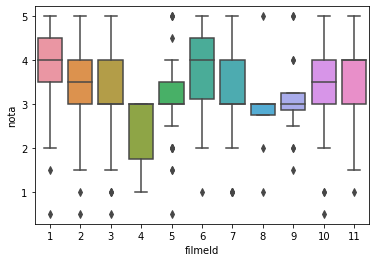

In [213]:
sns.boxplot(x="filmeId",y="nota",data=notas.query("filmeId in [1,2,3,4,5,6,7,8,9,10,11]"))

In [216]:
#Desvio padrão das notas
notas_toy_story.nota.std()

0.8348591407114047

In [ ]:
# Google search datasets e kaggles tem muitas fontes de dados para testar
# Palavra-chave para estudo : eda - exploratory data analysis